# SISTEMAS - Ejercicio 4 
Encuentre la respuesta al impulso de los sistemas LTI causales descriptos por las siguientes ecuaciones en diferencias y clasif´ıquelos en funci´on de ´esta. Utilice condiciones iniciales nulas.
1. $y[n] - y[n-2] =x[n]$


[1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]


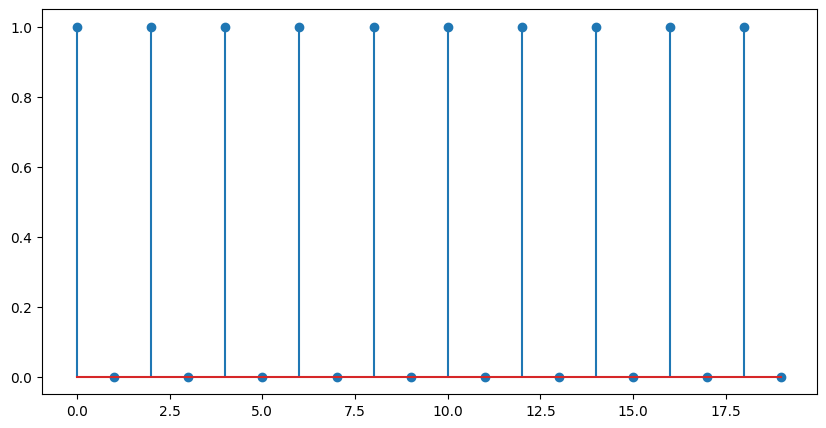

In [4]:
import numpy as np
import matplotlib.pyplot as plt
# Inciso 1:
N = 20
x = np.zeros(N)
x[0] = 1
y = np.zeros(N)

# y[n-2] = y[n-1] = 0 cuando n = 0,1
y[0] = x[0] #y[n] = x[n] + y[n-2] => y[0] = x[0] + 0
y[1] = x[1] #y[n] = x[n] + y[n-2] => y[1] = x[1] + 0

for n in range(2,len(x)):
  y[n] = y[n-2] + x[n]
print(y)

plt.figure(figsize=(10, 5))
plt.stem(y)
plt.show()



Sistema: IIR (de respuesta infinita al impulso) ya que no oscila infinitamente entre 0 y 1

<hr>

2. $y[n] = x[n] + 0.5x[n-1]$



[1.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0. ]


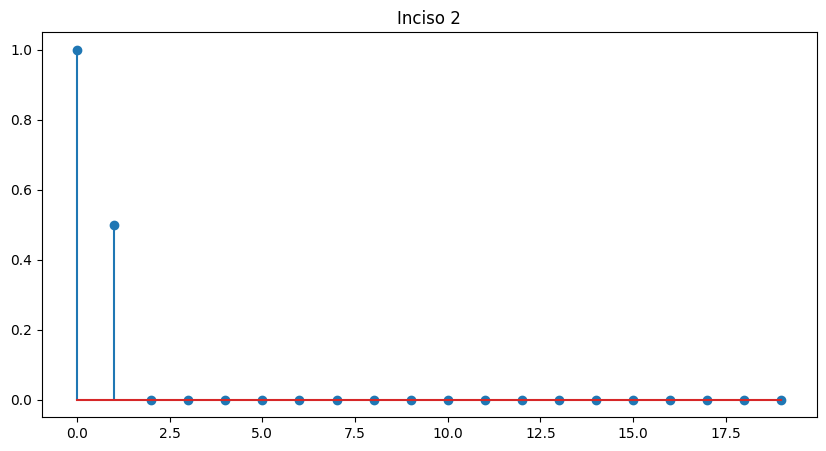

In [6]:
# Inciso 2:
x = np.zeros(N)
x[0] = 1
y = np.zeros(N)

y[0] = x[0] #y[0] = x[0] + x[0-1] => y[0] = x[0] + 0 
for n in range(1,len(x)):
  y[n] = x[n] + 0.5*x[n-1]

print(y)

plt.figure(figsize=(10, 5))
plt.title("Inciso 2")
plt.stem(y)
plt.show()

Sistema: FIR (Respuesta Finita al Impulso) debido a que luego de tiempo determinado (2 impulsos en este caso) el sistema se mantiene exactamente en cero.

<hr>

3. $y[n] - 0.5y[n-1]+0.25y[n-2] = x[n]$

[ 1.00000000e+00  5.00000000e-01  0.00000000e+00 -1.25000000e-01
 -6.25000000e-02  0.00000000e+00  1.56250000e-02  7.81250000e-03
  0.00000000e+00 -1.95312500e-03 -9.76562500e-04  0.00000000e+00
  2.44140625e-04  1.22070312e-04  0.00000000e+00 -3.05175781e-05
 -1.52587891e-05  0.00000000e+00  3.81469727e-06  1.90734863e-06]


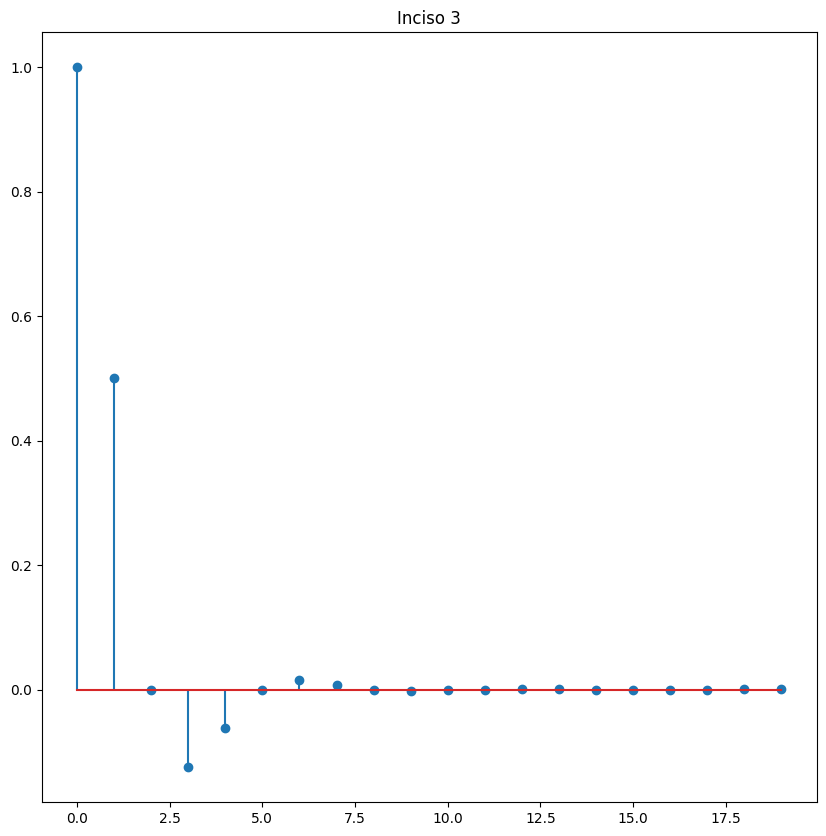

In [9]:
# Inciso 3:
x = np.zeros(N) 
y = np.zeros(N)
x[0] = 1
y[0] = x[0]   #y[0] = x[0] + 0.5y[0-1] - 0.25y[0-2] => y[0] = x[0] + 0 + 0
y[1] = x[1] + 0.5*y[0] #y[1] = x[1] + 0.5y[0] - 0.25y[0-1] => y[1] = x[1] + 0.5y[0] + 0  
for n in range(2,len(x)):
  y[n] = x[n] + 0.5*y[n-1] - 0.25*y[n-2]
print(y)
plt.figure(figsize=(10, 10))
plt.title("Inciso 3")
plt.stem(y)
plt.show()